In [101]:
import numpy as np
import matplotlib.pyplot as plt
import math 

In [102]:
def get_depth_offset(depth, L, D):
    nv_box = L ** D
    return int((nv_box ** (depth + 1) - 1) / (nv_box - 1) - 1)

In [103]:
D, L, R = (2, 8, 3)
file = "hierarchical_out"
data = np.loadtxt(f"{file}.txt").reshape((get_depth_offset(R, L, D), 2))

In [104]:
angles = np.arctan2(data[:,0], data[:,1])
angles.min(), angles.max(), angles.mean()

(-3.1403306542597647, 3.1342527854011673, -0.831261036056169)

In [111]:
depth = 0
size = L ** (depth + 1)
array = np.zeros(size*size).reshape((size,size))

offset_level = get_depth_offset(depth, L, D)
size_level = L ** (depth)

for i in range(size_level ** 2):
    x = (i // size_level) * size_level
    y = (i % size_level) * size_level
    array[x:x+size_level, y:y+size_level] = angles[offset_level + i * size_level ** 2:offset_level + (i+1) * size_level ** 2].reshape(size_level, size_level)

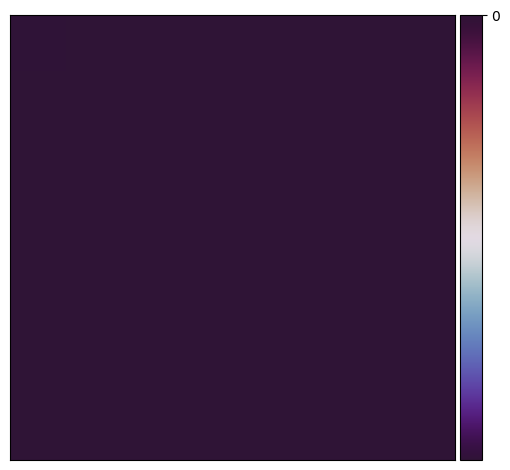

In [112]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots()
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)

im = ax.imshow(array, cmap="twilight_shifted",interpolation='none')
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
cbar = fig.colorbar(im, cax=cax, orientation='vertical', ticks=[-math.pi/2, 0, math.pi / 2])
cbar.set_ticklabels(["-π/2", 0, "π/2"])

fig.tight_layout()
fig.savefig(f"{file}.eps", format="eps", transparent=True,bbox_inches='tight', pad_inches=0)